# **Level 2**

Upload dataset on Google Colab

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# **Task 1: Table Booking and Online Delivery**

**Percentage of Restaurants with Table Booking & Online Delivery**

In [ ]:
# Percentage with Table Booking
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
print("Table Booking Availability (%):\n", table_booking_pct)

# Percentage with Online Delivery
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nOnline Delivery Availability (%):\n", online_delivery_pct)

Table Booking Availability (%):
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery Availability (%):
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


**Compare Average Ratings - With vs Without Table Booking**


Average Ratings (Table Booking vs No Booking):
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-5-2406560535.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, palette="Set2")


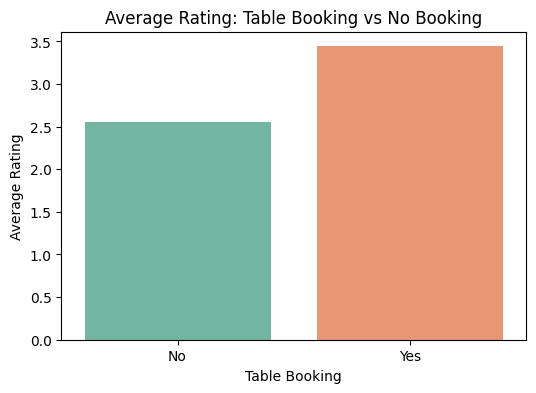

In [ ]:
# Compare ratings
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Ratings (Table Booking vs No Booking):\n", avg_rating_table_booking)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, palette="Set2")
plt.title("Average Rating: Table Booking vs No Booking")
plt.ylabel("Average Rating")
plt.xlabel("Table Booking")
plt.show()

**Online Delivery Availability by Price Range**


Online Delivery % by Price Range:
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


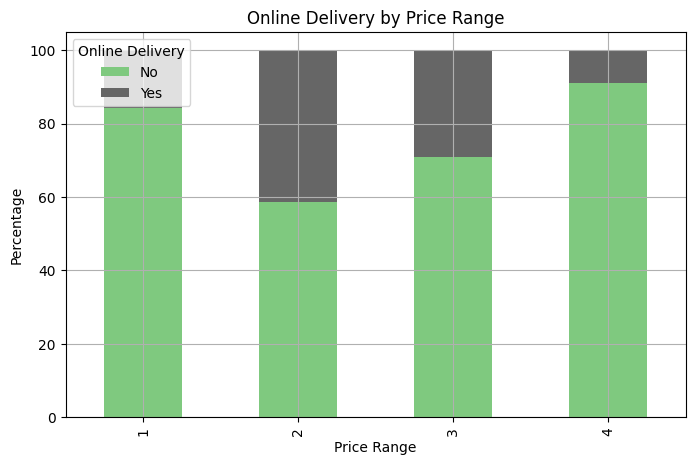

In [ ]:
# Cross tab
online_delivery_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("\nOnline Delivery % by Price Range:\n", online_delivery_price)

# Visualize
online_delivery_price.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8,5))
plt.title("Online Delivery by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Online Delivery")
plt.grid(True)
plt.show()

# **Task 2: Price Range Analysis**

**Most Common Price Range**

In [ ]:
common_price_range = df['Price range'].value_counts().idxmax()
print("Most Common Price Range:", common_price_range)

Most Common Price Range: 1


**Average Rating for Each Price Range**


Average Rating by Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-10-2066507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_price.index, y=avg_rating_per_price.values, palette='coolwarm')


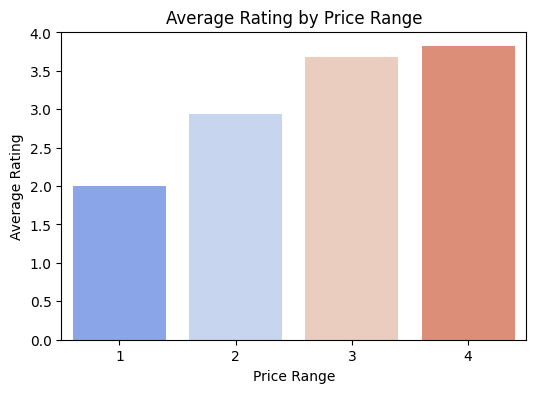

In [ ]:
avg_rating_per_price = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating by Price Range:\n", avg_rating_per_price)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=avg_rating_per_price.index, y=avg_rating_per_price.values, palette='coolwarm')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

**Rating Color with Highest Average Rating**

In [ ]:
# Find the color with highest average rating
avg_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean()
top_color = avg_rating_by_color.idxmax()
print("Color representing highest average rating:", top_color)

Color representing highest average rating: Dark Green


# **Task 3: Feature Engineering**

**Extract Length of Restaurant Name and Address**

In [ ]:
df['Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

# Check new columns
print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


**Encode Categorical as Binary Features**

In [ ]:
# Encode table booking and delivery
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Confirm encoding
print(df[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())

  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3                No                  0                  No   
4               Yes                  1                  No   

   Has Online Delivery  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


# **Level 3**

# **Task 1: Predictive Modeling**

**Prepare Dataset for Regression**

In [ ]:
# Drop rows with missing votes if any
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.dropna(subset=['Votes'], inplace=True)

# Select features
features = ['Votes', 'Price range', 'Has Table Booking', 'Has Online Delivery', 'Name Length', 'Address Length']
target = 'Aggregate rating'

X = df[features]
y = df[target]

**Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Regression Models & Compare**

***A. Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import mean_squared_error
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)



# Linear Regression Metrics
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

Linear Regression R²: 0.26283619645694944
Linear Regression RMSE: 1.2953243457046082


***B. Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# Decision Tree
print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree RMSE:", rmse_dt)

Decision Tree R²: 0.8983813453473767
Decision Tree RMSE: 0.4809315267665352


***C. Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
# Random Forest
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest R²: 0.9453054987910234
Random Forest RMSE: 0.35283231983797136


# **Task 2: Customer Preference Analysis**

**Cuisine vs Aggregate Rating**

In [ ]:
# Group by cuisine and average rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating by cuisine (top 10):\n", cuisine_rating.head(10))

Average rating by cuisine (top 10):
 Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


**Popular Cuisines by Votes**

In [ ]:
# Group by cuisine and total votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("Top 10 Popular Cuisines by Votes:\n", popular_cuisines)

Top 10 Popular Cuisines by Votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


**High-Rated Cuisines (filter-based)**

In [ ]:
# Filter cuisines with average rating > 4
high_rated_cuisines = cuisine_rating[cuisine_rating > 4]
print("Cuisines with avg rating > 4:\n", high_rated_cuisines)

Cuisines with avg rating > 4:
 Cuisines
Burger, Bar Food, Steak                      4.900000
American, Burger, Grill                      4.900000
American, Caribbean, Seafood                 4.900000
American, Coffee and Tea                     4.900000
Mexican, American, Healthy Food              4.900000
                                               ...   
North Indian, Fast Food, Italian, Asian      4.033333
Chinese, North Indian, Fast Food, Italian    4.033333
North Indian, Continental, Mughlai, Asian    4.033333
Pizza, Bar Food                              4.033333
American, Breakfast, Burger                  4.033333
Name: Aggregate rating, Length: 486, dtype: float64


# **Task 3: Data Visualization**

**Rating Distribution**

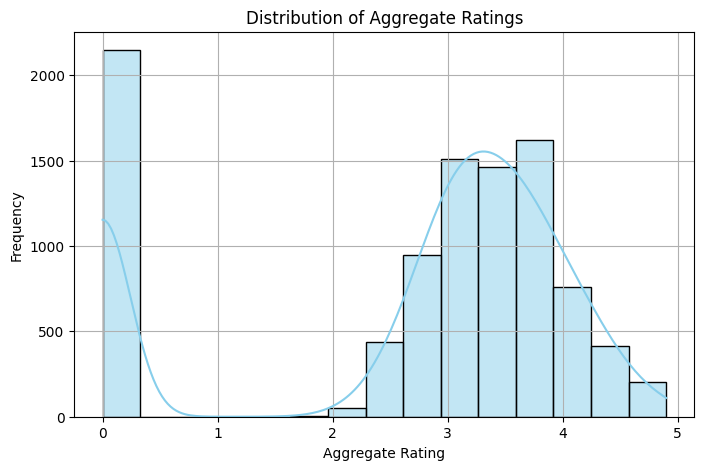

In [ ]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Average Rating by Cuisine or City**

/tmp/ipython-input-25-2614514619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='viridis')


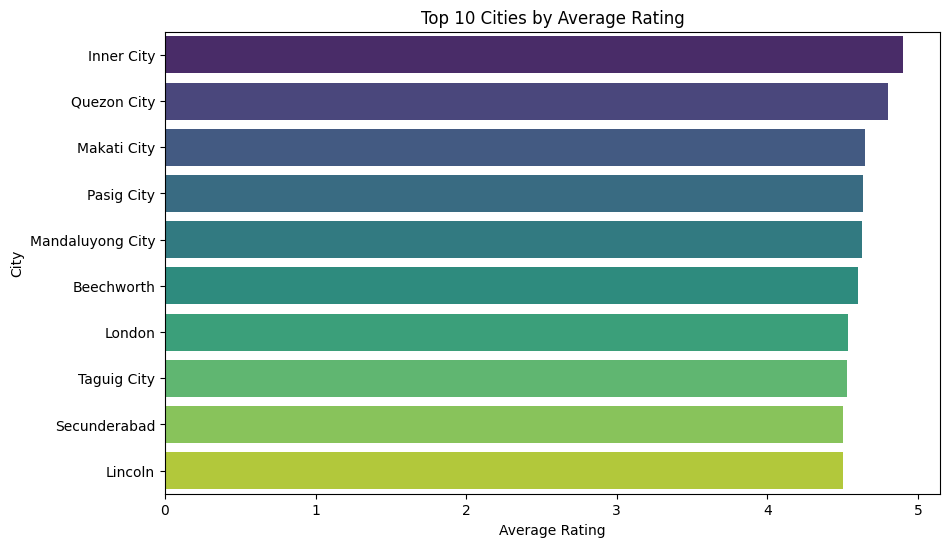

In [ ]:
# Top 10 cities by average rating
top_city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='viridis')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

/tmp/ipython-input-26-1143097503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisine_ratings.values, y=top_cuisine_ratings.index, palette='coolwarm')


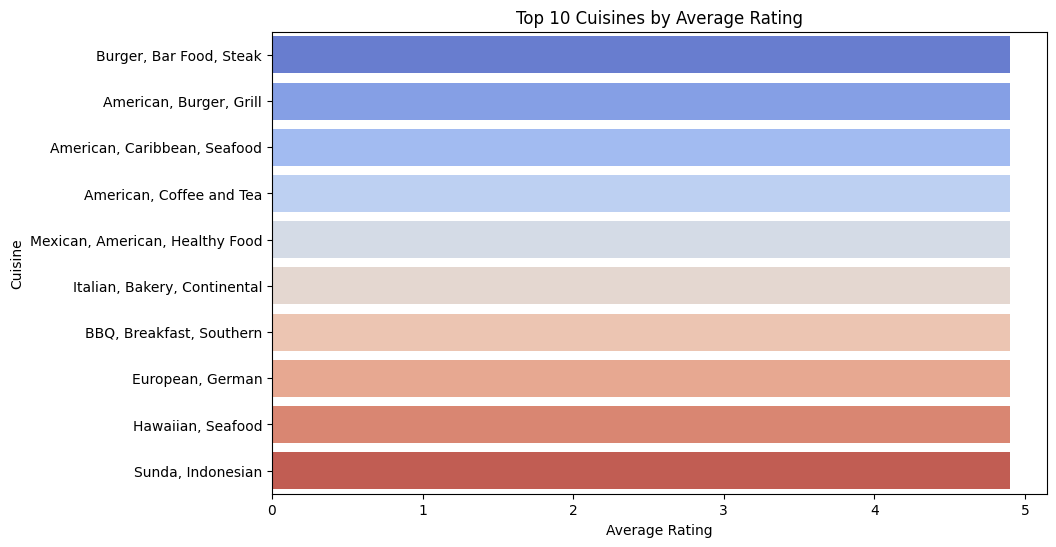

In [ ]:
# Top 10 cuisines by average rating
top_cuisine_ratings = cuisine_rating.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisine_ratings.values, y=top_cuisine_ratings.index, palette='coolwarm')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

**Correlation Heatmap (Feature vs Target)**

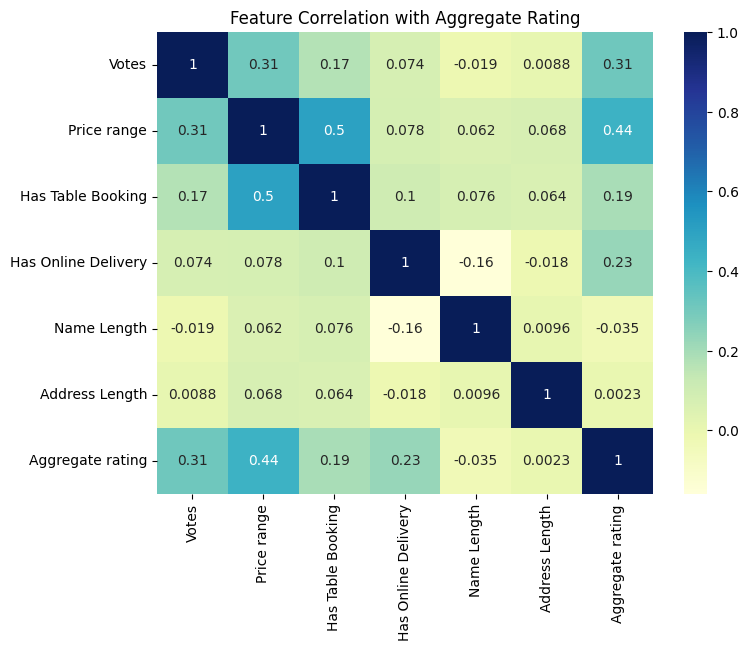

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation with Aggregate Rating")
plt.show()